In [2]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
import yfinance as yf
from alpha_vantage.timeseries import TimeSeries
import mplfinance as mpf

# *TASK 1*

In [12]:
import time
import random
df=yf.download("NVDA",period="1y",interval="1d",progress=False)
time.sleep(random.uniform(2,5))
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-07-03,128.239487,128.239487,121.321674,121.621582,215749000
2024-07-05,125.790268,128.809319,125.640314,127.339774,214176700
2024-07-08,128.159500,130.728696,126.999871,127.449725,237677300
2024-07-09,131.338516,133.777748,128.609367,130.308843,285366600
2024-07-10,134.867401,135.057344,132.378182,133.987674,248978600


In [15]:
html_table=df.to_html()

In [35]:
df=df.dropna()
#df=df.fillna(method='ffill')     #older way to do it below is new way to do it suggested in error box
#df=df.ffill()

In [36]:
df["Rolling_Moving_Average"]=df['Close'].rolling(20).mean()
df["Rolling_Moving_Average"].head()

Date
2024-07-01   NaN
2024-07-02   NaN
2024-07-03   NaN
2024-07-05   NaN
2024-07-08   NaN
Name: Rolling_Moving_Average, dtype: float64

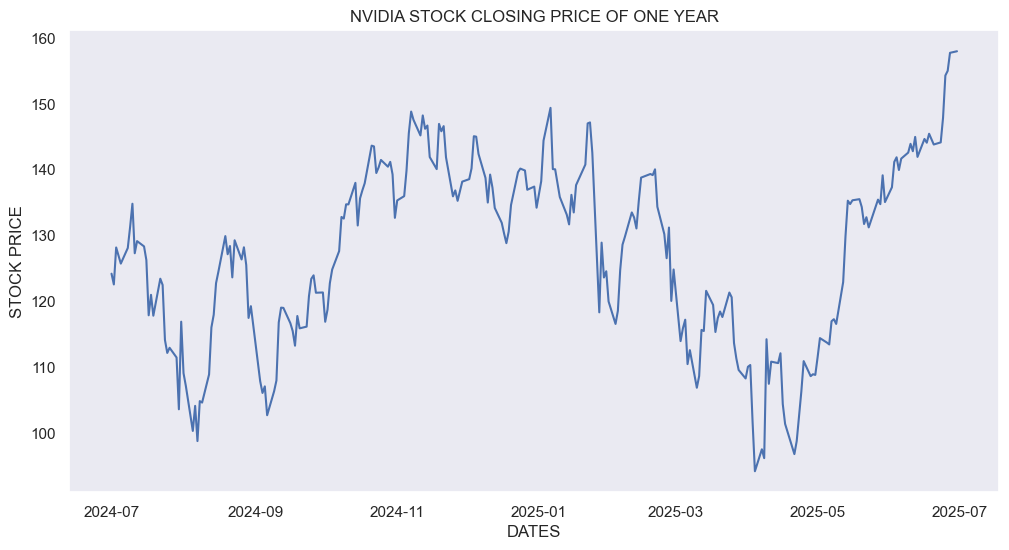

In [37]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
sns.set(style='darkgrid')
plt.title("NVIDIA STOCK CLOSING PRICE OF ONE YEAR")
plt.xlabel("DATES")
plt.ylabel("STOCK PRICE")
plt.grid()
plt.show()

# *TASK 2*

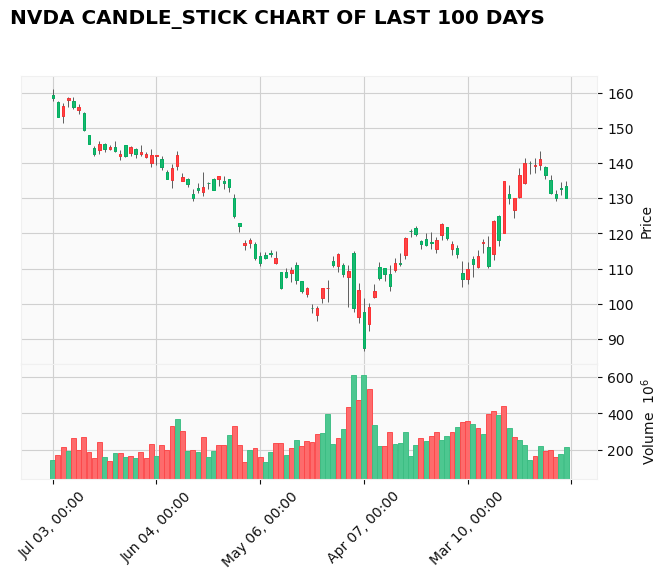

<Figure size 1200x600 with 0 Axes>

In [12]:
from alpha_vantage.timeseries import TimeSeries
import mplfinance as mpf

ts = TimeSeries(key='PLEASE_ENTER_YOUR_API_KEY_HERE(NOT PUT MINE FOR PRIVACY)', output_format='pandas')
df, meta_df = ts.get_daily(symbol='NVDA', outputsize='compact')

df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df.index = pd.to_datetime(df.index)


mpf.plot(df.tail(100),type='candle',volume=True, style='yahoo',title='NVDA CANDLE_STICK CHART OF LAST 100 DAYS')
plt.figure(figsize=(12,6))
plt.show()

In [14]:
print(meta_df)

{'1. Information': 'Daily Prices (open, high, low, close) and Volumes', '2. Symbol': 'NVDA', '3. Last Refreshed': '2025-07-03', '4. Output Size': 'Compact', '5. Time Zone': 'US/Eastern'}


In [20]:
df['Moving Average 50']=df['Close'].rolling(window=50).mean()
df['Moving Average 95']=df['Close'].rolling(window=95).mean()
print(df[['Moving Average 50','Moving Average 95','Close']].tail())

            Moving Average 50  Moving Average 95   Close
date                                                    
2025-02-14           114.7138         124.754000  138.85
2025-02-13           115.2450         124.522842  135.29
2025-02-12           115.6476         124.289579  131.14
2025-02-11           116.1750         124.024421  132.80
2025-02-10           116.7922         123.769895  133.57


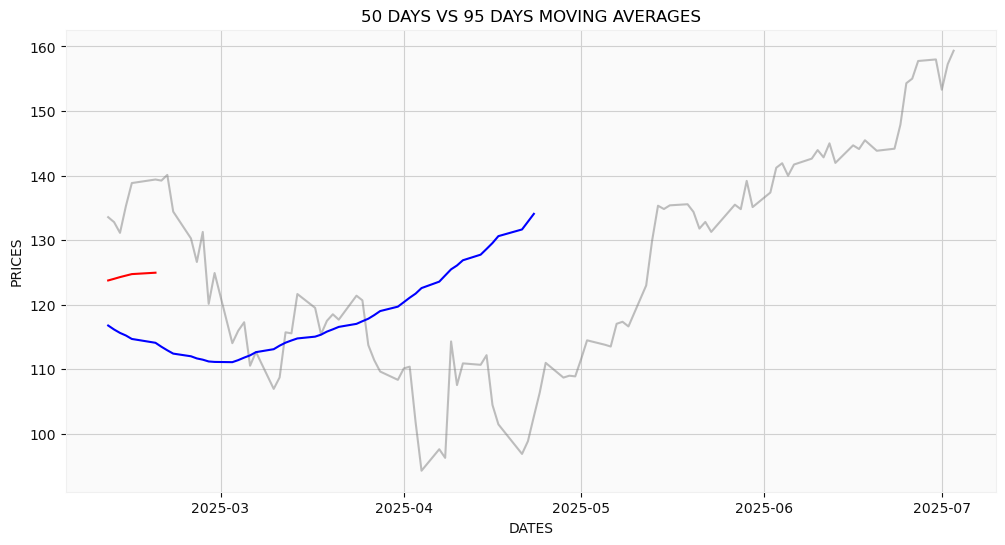

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Closing Price', color='gray', alpha=0.5)
plt.plot(df['Moving Average 50'], label='50-day MA', color='blue', linewidth=1.5)
plt.plot(df['Moving Average 95'], label='95-day MA', color='red', linewidth=1.5)
plt.title("50 DAYS VS 95 DAYS MOVING AVERAGES")
plt.xlabel("DATES")
plt.ylabel("PRICES")
plt.show()

# *TASK 3*

In [8]:
df['Daily Returns']=df['Close'].pct_change()*100
df['Daily Returns']

date
2025-07-03         NaN
2025-07-02   -1.311661
2025-07-01   -2.511924
2025-06-30    3.059361
2025-06-27   -0.151908
                ...   
2025-02-14   -0.394548
2025-02-13   -2.563918
2025-02-12   -3.067485
2025-02-11    1.265823
2025-02-10    0.579819
Name: Daily Returns, Length: 100, dtype: float64

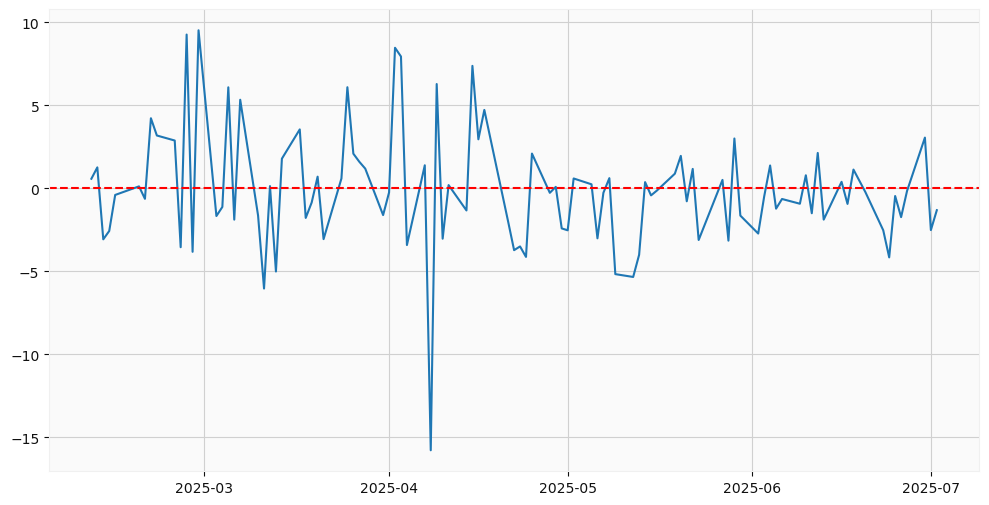

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df['Daily Returns'])
plt.title=("NVDA Daily Returns (%)")
plt.axhline(0, color='red', linestyle='--')  
plt.show()

In [10]:
daily_volatility=df['Daily Returns'].std()
daily_volatility

3.583378359426338

In [18]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df.index,open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'],name='Price')])

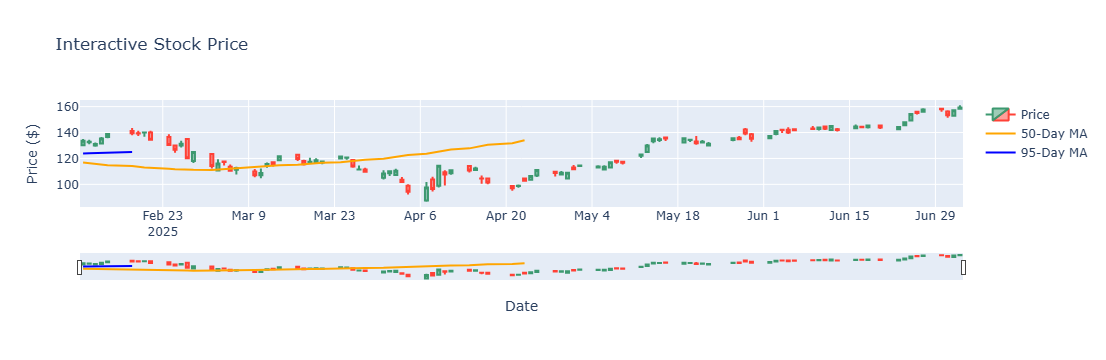

In [24]:
fig.add_trace(go.Scatter(x=df.index,y=df['Moving Average 50'],name='50-Day MA',line=dict(color='orange')))
fig.add_trace(go.Scatter(x=df.index,y=df['Moving Average 95'],name='95-Day MA',line=dict(color='blue'))) 


fig.update_layout(title='Interactive Stock Price',xaxis_title='Date',yaxis_title='Price ($)',hovermode='x unified')  

In [25]:
fig.write_html('interactive_candlestick.html')